'''

@Author: Jayesh Patil

@Date: 17-11-24

@Title: Single layer neural network to Predict Subscription to Term Deposit

'''

1.Based on bank customer data, predicted whether cutomer will subscribe to term deposit or not using single layer neural network

Import Necessary Libraries

In [3]:
pip install tensorflow


You should consider upgrading via the 'c:\Users\Jayesh\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder

Load Dataset

In [5]:
df = pd.read_csv('bank.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Analysing Dataset

In [6]:
print(df.describe())
print(df.info())
print(df.shape)

               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000  
<class 'pandas.cor

Handle missing data

In [7]:
print("Null Values ",df.isnull().sum())

Null Values  age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


Handling categroical data

In [8]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [9]:
numeric_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
binary_cols = ['default', 'housing', 'loan', 'y']
categorical_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

Use Label Encoding for Encode Binary Columns

In [10]:
label_encoder = LabelEncoder()

for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])


One-Hot Encode Categorical Columns

In [11]:
# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # Replace sparse with sparse_output for scikit-learn 1.0+

# One-Hot Encode and Convert to DataFrame
encoded_data = pd.DataFrame(
    one_hot_encoder.fit_transform(df[categorical_cols]),
    columns=one_hot_encoder.get_feature_names_out(categorical_cols)
)

# Drop original categorical columns and integrate encoded data
df = df.drop(columns=categorical_cols)
df = pd.concat([df.reset_index(drop=True), encoded_data.reset_index(drop=True)], axis=1)

In [12]:
df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,33,0,4789,1,1,11,220,1,339,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35,0,1350,1,0,16,185,1,330,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30,0,1476,1,1,3,199,4,-1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,59,0,0,1,0,5,226,1,-1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0,-333,1,0,30,329,5,-1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4517,57,1,-3313,1,1,9,153,1,-1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4518,57,0,295,0,0,19,151,11,-1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4519,28,0,1137,0,0,6,129,4,211,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
y = df['y']
x = df.drop(columns=['y'])

In [14]:
x

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,33,0,4789,1,1,11,220,1,339,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35,0,1350,1,0,16,185,1,330,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30,0,1476,1,1,3,199,4,-1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,59,0,0,1,0,5,226,1,-1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0,-333,1,0,30,329,5,-1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4517,57,1,-3313,1,1,9,153,1,-1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4518,57,0,295,0,0,19,151,11,-1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4519,28,0,1137,0,0,6,129,4,211,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

In [16]:
print(x.shape)
print(y.shape)

(4521, 42)
(4521,)


Spliting Dataset

In [17]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Scaling dataset

In [18]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Built Model

In [19]:
# Build the Single Layer Neural Network
model = Sequential()
model.add(Dense(1, input_dim=X_train_scaled.shape[1], activation='sigmoid'))  # Single layer with 1 neuron

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)



Epoch 1/10


c:\Users\Jayesh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4808 - loss: 0.8442 - val_accuracy: 0.5401 - val_loss: 0.7591
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5671 - loss: 0.7375 - val_accuracy: 0.6105 - val_loss: 0.6738
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.6336 - loss: 0.6634 - val_accuracy: 0.6975 - val_loss: 0.6092
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.7048 - loss: 0.5997 - val_accuracy: 0.7790 - val_loss: 0.5603
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.7757 - loss: 0.5587 - val_accuracy: 0.8273 - val_loss: 0.5209
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.8303 - loss: 0.5133 - val_accuracy: 0.8481 - val_loss: 0.4895
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.8522 - loss: 0.4847 - val_accuracy: 0.8702 - val_loss: 0.4622
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.8621 - loss: 0.4713 - val_accuracy: 0.8840 - val_loss

In [20]:
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step


Checke Accuracy

In [21]:
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy * 100:.2f}%")

Test Loss: 0.4144, Test Accuracy: 88.18%


In [22]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
cr = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print("Classification Report:")
print(cr)


Confusion Matrix:
[[746  61]
 [ 46  52]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.94      0.92      0.93       807
     Class 1       0.46      0.53      0.49        98

    accuracy                           0.88       905
   macro avg       0.70      0.73      0.71       905
weighted avg       0.89      0.88      0.89       905



Plot Graph 

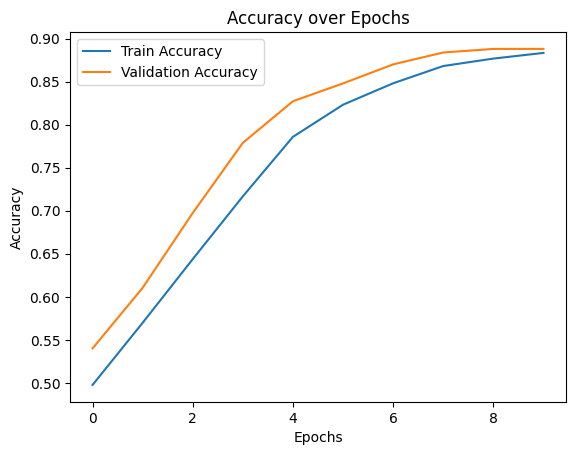

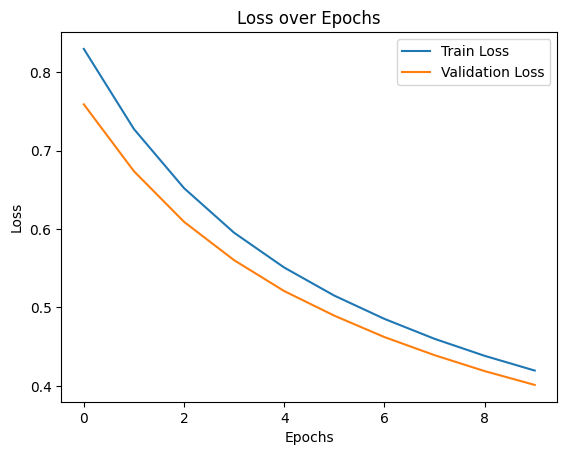

In [23]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
